In [1]:
import os
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util import load_data, split_data, get_result
from tensorflow import keras

In [2]:
bilstm = keras.models.load_model('results/bilstm.h5')
lstm = keras.models.load_model('results/lstm.h5')

In [3]:
bilstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 512)           788480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [4]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            394240    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 64)             4

In [5]:
# load the dataset
X, y = load_data()

# split the data into training, validation and testing sets
data = split_data(X, y, test_size=0.2, valid_size=0.2)

y_train = data["y_train"].reshape(-1).astype(int)
y_valid = data["y_valid"].reshape(-1).astype(int)
y_test = data["y_test"].reshape(-1).astype(int)

## Bi-LSTM

2/2 [==============================] - 2s 7ms/step


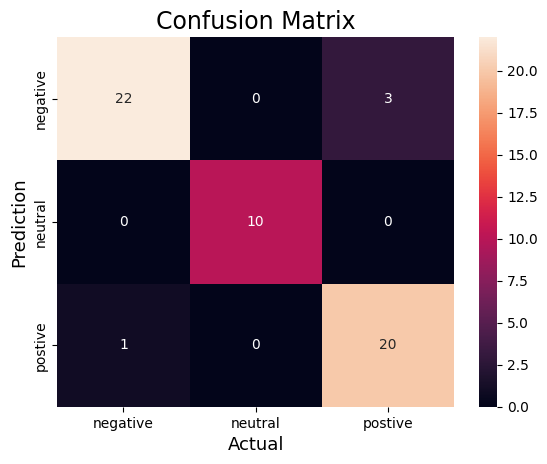

In [6]:
bi_predict = bilstm.predict(data["X_test"])
bi_predict_label = np.argmax(bi_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, bi_predict_label)
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=['negative','neutral', 'postive'],
            yticklabels=['negative','neutral', 'postive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## LSTM

2/2 [==============================] - 2s 7ms/step


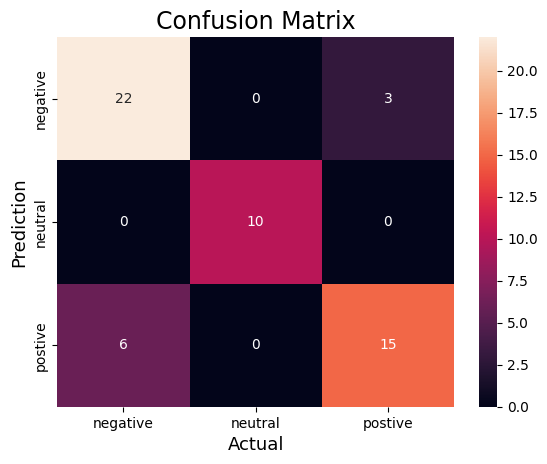

In [7]:
lstm_predict = lstm.predict(data["X_test"])
lstm_predict_label = np.argmax(lstm_predict, axis=2).flatten()
confusion_matrix = tf.math.confusion_matrix(y_test, lstm_predict_label)
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=['negative','neutral', 'postive'],
            yticklabels=['negative','neutral', 'postive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()